In [2]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
import torchvision
from torchvision import transforms
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from torch.utils.data import random_split
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [51]:
device

'cuda'

In [52]:
image_path = []
label = []

for i in os.listdir(f'/home/adityaraut/Documents/Machine-Learning-FCC/dl_fcc/afhq'):
    for labels in os.listdir(f'/home/adityaraut/Documents/Machine-Learning-FCC/dl_fcc/afhq/{i}'):
        for image in os.listdir(f'/home/adityaraut/Documents/Machine-Learning-FCC/dl_fcc/afhq/{i}/{labels}'):
            image_path.append(f'/home/adityaraut/Documents/Machine-Learning-FCC/dl_fcc/afhq/{i}/{labels}/{image}')
            label.append(labels)
            

data_df = pd.DataFrame({"image_path": image_path, "labels": label})

print(data_df['labels'].unique())
data_df

['cat' 'dog' 'wild']


,image_path,labels
0,/home/adityaraut/Documents/Machine-Learning-FC...,cat
1,/home/adityaraut/Documents/Machine-Learning-FC...,cat
2,/home/adityaraut/Documents/Machine-Learning-FC...,cat
3,/home/adityaraut/Documents/Machine-Learning-FC...,cat
4,/home/adityaraut/Documents/Machine-Learning-FC...,cat
...,...,...
16125,/home/adityaraut/Documents/Machine-Learning-FC...,wild
16126,/home/adityaraut/Documents/Machine-Learning-FC...,wild
16127,/home/adityaraut/Documents/Machine-Learning-FC...,wild
16128,/home/adityaraut/Documents/Machine-Learning-FC...,wild


In [53]:
dataset_size = len(data_df)
train_size = int(0.7 * dataset_size)
val_size   = int(0.15 * dataset_size)
test_size  = dataset_size - train_size - val_size  

train, val, test = random_split(data_df, [train_size, val_size, test_size])

In [54]:
len(train), len(val), len(test)

(11291, 2419, 2420)

In [55]:
label_encoder= LabelEncoder()
label_encoder.fit(data_df['labels'])

transforms = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float)
])

In [56]:
class CustomImageDataset(Dataset):
    def __init__(self, dataframe, transform = None):
        self.dataframe = dataframe
        self.transform = transform
        self.labels = torch.tensor(label_encoder.transform(dataframe['labels'])).to(device)
        
        
    def __len__(self):
        return self.dataframe.shape[0]
    
    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        label = self.labels[idx]
        
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image).to(device)
            
        return image, label

In [57]:
full_dataset = CustomImageDataset(dataframe=data_df, transform=transforms)

In [58]:
train_dataset, val_dataset, test_Dataset = random_split(full_dataset, [train_size, val_size, test_size])

In [59]:
train_dataset.__getitem__(2)

(tensor([[[0.5922, 0.5922, 0.5961,  ..., 0.5137, 0.5255, 0.5294],
          [0.6000, 0.6078, 0.6078,  ..., 0.5098, 0.5059, 0.5137],
          [0.6196, 0.6157, 0.6157,  ..., 0.5255, 0.5216, 0.5255],
          ...,
          [0.4745, 0.4863, 0.4549,  ..., 0.5961, 0.6235, 0.6157],
          [0.4627, 0.5059, 0.4706,  ..., 0.5843, 0.6039, 0.6000],
          [0.4510, 0.4980, 0.4588,  ..., 0.4784, 0.4980, 0.5098]],
 
         [[0.6471, 0.6471, 0.6510,  ..., 0.6078, 0.6196, 0.6275],
          [0.6549, 0.6627, 0.6627,  ..., 0.6196, 0.6157, 0.6235],
          [0.6745, 0.6706, 0.6706,  ..., 0.6275, 0.6235, 0.6275],
          ...,
          [0.4431, 0.4588, 0.4392,  ..., 0.6706, 0.6902, 0.6784],
          [0.4314, 0.4784, 0.4549,  ..., 0.6627, 0.6784, 0.6667],
          [0.4196, 0.4706, 0.4431,  ..., 0.5765, 0.5882, 0.5922]],
 
         [[0.7490, 0.7490, 0.7529,  ..., 0.7333, 0.7451, 0.7529],
          [0.7569, 0.7647, 0.7647,  ..., 0.7333, 0.7333, 0.7373],
          [0.7765, 0.7725, 0.7725,  ...,

In [60]:
label_encoder.inverse_transform([0])

array(['cat'], dtype=object)

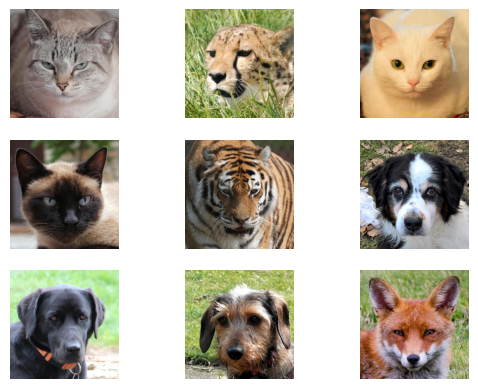

In [61]:
n_row = 3
n_col = 3

f, axarr = plt.subplots(n_row, n_col)

for row in range(n_row):
    for col in range(n_col):
        image = Image.open(data_df.sample(n = 1)['image_path'].iloc[0]).convert('RGB')
        axarr[row, col].imshow(image)
        axarr[row, col].axis('off')

In [62]:
lr = 0.001
batch_size = 16
epochs = 10

In [63]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_Dataset, batch_size=batch_size, shuffle=True)

In [64]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding = 1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding = 1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding = 1)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten() 
        self.pool = nn.MaxPool2d(2, 2)
        self.linear = nn.Linear((128*16*16), 128)
        self.output = nn.Linear(128, 3)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.linear(x)
        x = self.output(x)
        return x

In [65]:
from torchsummary import summary

model = NN().to(device)

summary(model, input_size=(3, 128, 128))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
              ReLU-2         [-1, 32, 128, 128]               0
         MaxPool2d-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
              ReLU-5           [-1, 64, 64, 64]               0
         MaxPool2d-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]          73,856
              ReLU-8          [-1, 128, 32, 32]               0
         MaxPool2d-9          [-1, 128, 16, 16]               0
          Flatten-10                [-1, 32768]               0
           Linear-11                  [-1, 128]       4,194,432
           Linear-12                    [-1, 3]             387
Total params: 4,288,067
Trainable params: 4,288,067
Non-trainable params: 0
---------------------------

In [66]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=lr)

In [68]:
for epoch in range(epochs):
    model.train()
    total_loss_train = 0
    total_acc_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss_train += loss.item()
        total_acc_train += (outputs.argmax(1) == labels).sum().item()

    model.eval()
    total_loss_val = 0
    total_acc_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss_val += loss.item()
            total_acc_val += (outputs.argmax(1) == labels).sum().item()

    train_loss = total_loss_train / len(train_loader)
    val_loss = total_loss_val / len(val_loader)
    train_acc = total_acc_train / len(train_dataset) * 100
    val_acc = total_acc_val / len(val_dataset) * 100

    print(f"Epoch {epoch+1}: Train Loss {train_loss:.3f}, Train Acc {train_acc:.2f}%, Val Loss {val_loss:.3f}, Val Acc {val_acc:.2f}%", flush=True)


Epoch 1: Train Loss 0.346, Train Acc 86.51%, Val Loss 0.218, Val Acc 91.03%
Epoch 2: Train Loss 0.152, Train Acc 94.55%, Val Loss 0.131, Val Acc 95.54%
Epoch 3: Train Loss 0.111, Train Acc 96.06%, Val Loss 0.122, Val Acc 95.62%
Epoch 4: Train Loss 0.075, Train Acc 97.38%, Val Loss 0.148, Val Acc 95.78%
Epoch 5: Train Loss 0.066, Train Acc 97.54%, Val Loss 0.121, Val Acc 96.16%
Epoch 6: Train Loss 0.053, Train Acc 98.11%, Val Loss 0.147, Val Acc 95.82%
Epoch 7: Train Loss 0.042, Train Acc 98.50%, Val Loss 0.165, Val Acc 95.49%
Epoch 8: Train Loss 0.043, Train Acc 98.36%, Val Loss 0.164, Val Acc 95.45%
Epoch 9: Train Loss 0.031, Train Acc 98.88%, Val Loss 0.165, Val Acc 95.95%
Epoch 10: Train Loss 0.035, Train Acc 98.76%, Val Loss 0.179, Val Acc 95.37%


In [69]:
model.eval()  # set model to evaluation mode

test_loss = 0
correct = 0
total = 0

with torch.no_grad():  # disable gradient tracking
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        test_loss += loss.item()

        # classification accuracy
        _, predicted = torch.max(outputs, 1)  
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

avg_loss = test_loss / len(test_loader)
accuracy = 100 * correct / total

print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")


Test Loss: 0.2084, Test Accuracy: 94.83%


In [72]:
from PIL import Image
from torchvision import transforms

# Example: single image
img = Image.open("/home/adityaraut/Documents/Machine-Learning-FCC/dl_fcc/istockphoto-1018245126-612x612.jpg").convert("RGB")
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float)
])
img_tensor = transform(img).unsqueeze(0).to(device) 

model.eval()
with torch.no_grad():
    output = model(img_tensor)
    pred_class = output.argmax(1).item()

original_label = label_encoder.inverse_transform([pred_class])[0]
print(f"Predicted Label: {original_label}")

Predicted Label: wild


In [ ]:
# img = Image.open("/home/adityaraut/Documents/Machine-Learning-FCC/dl_fcc/istockphoto-1018245126-612x612.jpg").convert("RGB")
# transform = transforms.Compose([
#     transforms.Resize((128, 128)),
#     transforms.ToTensor(),
#     transforms.ConvertImageDtype(torch.float)
# ])
# img_tensor = transform(img).unsqueeze(0).to(device)

# model.eval()
# with torch.no_grad():
#     output = model(img_tensor)
#     pred_class = output.argmax(1).item()
    
# original_label = label_encoder.inverse_transform([pred_class])
# print(original_label)

NameError: name 'model' is not defined